example from
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [4]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

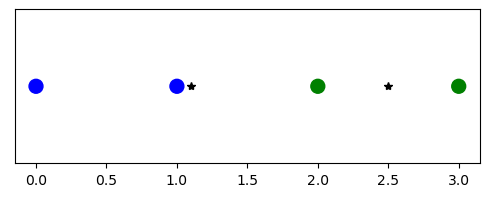

In [5]:
# 0 = blue, 1 = green
plt.figure(figsize=(6,2))
plt.scatter([0,1,2,3], [0,0,0,0], c=list('bbgg'), s=100)
plt.plot([1.1,2.5], [0,0], '*k')
plt.yticks([]);

In [6]:
knn3.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [7]:
knn3.predict([[1.1],[2.5], [1.5+1e-10]])

array([0, 1, 1])

In [8]:
# might need this to suppress warnings about scipy mode change to keepdims
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning) # ignore future warnings

In [9]:
#soft classification, predict probabilities
knn3.predict_proba([[1.1], [2.5], [1.5+1e-10]])

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667]])

In [10]:
#2d data
X = [[0,0], [1,0], [2,0], [3,1], [3,0]]
y = [0, 0, 1, 1, 1]
knn3.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

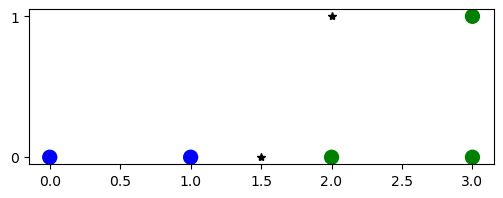

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(*zip(*X), c=list('bbggg'), s=100)
plt.gca().set_aspect(1)
plt.plot([1.5,2], [0,1], '*k')
plt.yticks([0,1]);

In [12]:
knn3.predict([[2,1], [1.5,0]])

array([1, 0])

In [13]:
knn3.predict_proba([[2+1e-10,1], [1.5,0]])

array([[0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [14]:
distances, indices = knn3.kneighbors([[2,1], [1.5,0]])
print ('closest 3 indices=', list(indices))
print ('and their distances=', list(distances))

closest 3 indices= [array([2, 3, 1]), array([1, 2, 0])]
and their distances= [array([1.        , 1.        , 1.41421356]), array([0.5, 0.5, 1.5])]


# 2 pixel data

In [15]:
def show_data(X, cbar=False):
    plt.imshow(X[None,:],cmap='Greys',vmin=0, vmax=15, aspect=1, interpolation='none')
    if cbar: plt.colorbar(boundaries=range(16), shrink=.7, ticks=range(0,16,3))
    plt.xticks([])
    plt.yticks([])

In [16]:
N=50
X_data = np.random.randint(16,size=(N,2))
y_data =np.zeros(N).astype(int)
y_data[np.linalg.norm(X_data - [7.5,7.5], axis=1) < 5] = 1
clrs = np.array(['C0','C1'])[y_data]

array([0, 7])

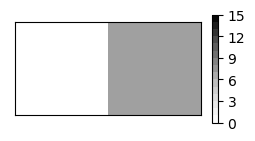

In [17]:
plt.figure(figsize=(3,2))
show_data(X_data[0], True)
X_data[0]

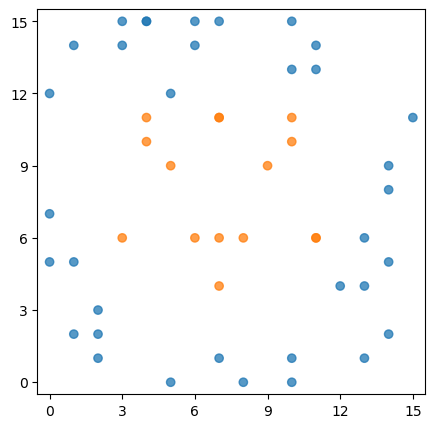

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(*X_data.T, alpha=.75, c=clrs)
plt.xticks(range(0,16,3))
plt.yticks(range(0,16,3))
plt.xlim(-.5,15.5)
plt.ylim(-.5,15.5);

In [ ]:
plt.figure(figsize=(8,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    show_data(X_data[i])
    plt.title(y_data[i], color=clrs[i])

In [ ]:
knn3.fit(X_data, y_data)

corners = [[i,j] for i in (0,15) for j in (0,15)]
distances, indices = knn3.kneighbors(corners + [[7.5,7.5]])
knn3.predict([[15,15],[0,0],[0,15],[15,0],[7.5,7.5]])

In [ ]:
plt.figure(figsize=(5,5))
    
for j in range(4):
  plt.plot(*corners[j],'.b')
  for v in indices[j]:
    plt.plot(*zip(corners[j], X_data[v]), 'b')
plt.plot(7.5,7.5,'.m')
for v in indices[4]: plt.plot(*zip([7.5,7.5], X_data[v]), 'm')


sc = plt.scatter(*X_data.T, alpha=.75, c=clrs)
plt.xticks(range(0,16,3))
plt.yticks(range(0,16,3))
plt.xlim(-.5,15.5)
plt.ylim(-.5,15.5);

In [ ]:
plt.figure(figsize=(8,6))
for i,j in enumerate(indices.flatten()):
    plt.subplot(5,3,i+1)
    show_data(X_data[j])

3 nearest neighbors to four corners and to center

# 3 pixel data

In [ ]:
#Now 3 pixel data
N=300
X_data = np.random.randint(16,size=(N,3))
y_data =np.zeros(N).astype(int)
y_data[np.linalg.norm(X_data - [7.5,7.5,7.5], axis=1)< 5] = 1
clrs = np.array(['C0','C1'])[y_data]

In [ ]:
plt.figure(figsize=(4,2))
show_data(X_data[0], True)
X_data[0]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
X_data[:,0].max()

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
#ax = plt.figure().add_subplot(projection='3d')
#ax = plt.axes(projection='3d')
ax.scatter(*X_data.T, alpha=.75, c=clrs)
ax.set_box_aspect((1,1,1));

In [ ]:
plt.figure(figsize=(8,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    show_data(X_data[i])
    plt.title(y_data[i], color=clrs[i])

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_data, y_data)
corners = [[i,j,k] for i in (0,15) for j in (0,15) for k in (0,15)]
distances, indices = knn5.kneighbors(corners + [[7.5,7.5,7.5]])
knn5.predict(corners + [[7.5,7.5,7.5]])

In [ ]:
plt.figure(figsize=(8,6))
for i,j in enumerate(indices.flatten()):
    plt.subplot(9,5,i+1)
    show_data(X_data[j])

5 nearest neighbors to eight corners and to center

In [ ]:
%matplotlib tk

In [ ]:
fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.azim=25
ax.elev=25

ax.scatter(*X_data.T, alpha=.75, c=clrs)

for j in range(8):
  ax.plot(*np.array(corners[j])[:,None],'.b')
  for v in indices[j]:
      ax.plot(*zip(corners[j], X_data[v]), 'b')
ax.plot([7.5],[7.5],[7.5],'.m')
for v in indices[8]: plt.plot(*zip([7.5,7.5,7.5], X_data[v]), 'm')
    
plt.xticks(range(0,16,3))
plt.yticks(range(0,16,3))
ax.set_zticks(range(0,16,3))
ax.set_box_aspect((1,1,1));